In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from enum import Enum
%matplotlib inline

In [23]:
class Labels(Enum):
    ALL = 0,
    TOXIC = 1,
    SEVERE_TOXIC = 2,
    OBSCENE = 3,
    THREAT = 4,
    INSULT = 5,
    IDENTITY_HATE = 6

class DataSets(Enum):
    TRAIN = 0,
    VALIDATION = 1

class Metrics(Enum):
    ROC_AUC = 0,
    F1 = 1

In [24]:
def calculate_mean_std(eval_scores, data_set, label, metric):
    #print(eval_scores[:, data_set.value, :, label.value, metric.value].shape)
    best_epochs = eval_scores[:, data_set.value, :, label.value, metric.value].max(axis=2)
    #print(best_epochs.shape)
    return best_epochs.mean(), best_epochs.std()

def calculated_all_metrics(scores):
    roc_all_mean, roc_all_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.ALL, Metrics.ROC_AUC)
    roc_c1_mean, roc_c1_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.TOXIC, Metrics.ROC_AUC)
    roc_c2_mean, roc_c2_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.SEVERE_TOXIC, Metrics.ROC_AUC)
    roc_c3_mean, roc_c3_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.OBSCENE, Metrics.ROC_AUC)
    roc_c4_mean, roc_c4_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.THREAT, Metrics.ROC_AUC)
    roc_c5_mean, roc_c5_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.INSULT, Metrics.ROC_AUC)
    roc_c6_mean, roc_c6_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.IDENTITY_HATE, Metrics.ROC_AUC)
    f1_all_mean, f1_all_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.ALL, Metrics.F1)
    f1_c1_mean, f1_c1_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.TOXIC, Metrics.F1)
    f1_c2_mean, f1_c2_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.SEVERE_TOXIC, Metrics.F1)
    f1_c3_mean, f1_c3_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.OBSCENE, Metrics.F1)
    f1_c4_mean, f1_c4_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.THREAT, Metrics.F1)
    f1_c5_mean, f1_c5_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.INSULT, Metrics.F1)
    f1_c6_mean, f1_c6_std = (0, 0)#calculate_mean_std(scores, DataSets.VALIDATION, Labels.IDENTITY_HATE, Metrics.F1)
    
    print("ROC AUC over 5 runs:")
    print("{:20s} {:.4f} ±{:.4f}".format('All labels:', roc_all_mean, roc_all_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Toxic:', roc_c1_mean, roc_c1_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Severe toxic:', roc_c2_mean, roc_c2_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Obscene:', roc_c3_mean, roc_c3_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Threat:', roc_c4_mean, roc_c4_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Insult:', roc_c5_mean, roc_c5_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Identity hate:', roc_c6_mean, roc_c6_std))
    print("F1 over 5 runs:")
    print("{:20s} {:.4f} ±{:.4f}".format('All labels:', f1_all_mean, f1_all_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Toxic:', f1_c1_mean, f1_c1_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Severe toxic:', f1_c2_mean, f1_c2_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Obscene:', f1_c3_mean, f1_c3_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Threat:', f1_c4_mean, f1_c4_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Insult:', f1_c5_mean, f1_c5_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Identity hate:', f1_c6_mean, f1_c6_std))

def plot_learningcurve(scores, label, metric):
    train_scores = scores[:, DataSets.TRAIN.value, :, label.value, metric.value].mean(axis=1)
    val_scores = scores[:, DataSets.VALIDATION.value, :, label.value, metric.value].mean(axis=1)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.plot(range(1,6),val_scores[0])
    ax.plot(range(1,6),train_scores[0])
    fig.show()

# CNN Architecture Experiments

### Singlelayer CNN

In [25]:
ex1_scores = np.load('data/scores/cnn_simple/scores_1543539380.5547197.npy')
ex1_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9790 ±0.0003
Toxic:               0.9631 ±0.0007
Severe toxic:        0.9863 ±0.0008
Obscene:             0.9764 ±0.0006
Threat:              0.9849 ±0.0027
Insult:              0.9715 ±0.0006
Identity hate:       0.9768 ±0.0016
F1 over 5 runs:
All labels:          0.6398 ±0.0045
Toxic:               0.6728 ±0.0054
Severe toxic:        0.3369 ±0.0086
Obscene:             0.6855 ±0.0045
Threat:              0.4349 ±0.0421
Insult:              0.6564 ±0.0070
Identity hate:       0.0000 ±0.0000


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


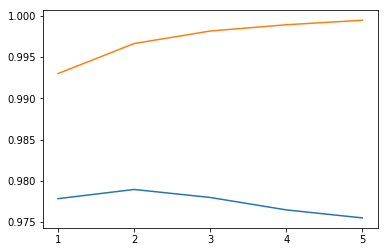

In [26]:
calculated_all_metrics(ex1_scores)
plot_learningcurve(ex1_scores, Labels.ALL, Metrics.ROC_AUC)

### Singlelayer CNN with multiple window sizes

In [27]:
ex2_scores = np.load('data/scores/cnn_multiwindowsizes/scores_1543641482.1065862.npy')
ex2_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9790 ±0.0006
Toxic:               0.9631 ±0.0007
Severe toxic:        0.9869 ±0.0006
Obscene:             0.9756 ±0.0003
Threat:              0.9848 ±0.0010
Insult:              0.9709 ±0.0010
Identity hate:       0.9767 ±0.0008
F1 over 5 runs:
All labels:          0.6401 ±0.0072
Toxic:               0.6710 ±0.0108
Severe toxic:        0.3568 ±0.0398
Obscene:             0.6836 ±0.0044
Threat:              0.4110 ±0.0366
Insult:              0.6549 ±0.0051
Identity hate:       0.0000 ±0.0000


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


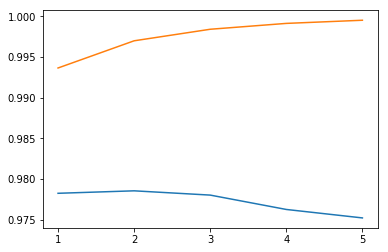

In [28]:
calculated_all_metrics(ex2_scores)
plot_learningcurve(ex2_scores, Labels.ALL, Metrics.ROC_AUC)

### Multilayer CNN

In [29]:
ex3_scores = np.load('data/scores/cnn_multilayer/scores_1543686279.5532448.npy')
ex3_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9776 ±0.0008
Toxic:               0.9607 ±0.0010
Severe toxic:        0.9873 ±0.0005
Obscene:             0.9752 ±0.0008
Threat:              0.9830 ±0.0007
Insult:              0.9692 ±0.0006
Identity hate:       0.9727 ±0.0019
F1 over 5 runs:
All labels:          0.6327 ±0.0029
Toxic:               0.6638 ±0.0101
Severe toxic:        0.3540 ±0.0364
Obscene:             0.6849 ±0.0080
Threat:              0.3632 ±0.0327
Insult:              0.6429 ±0.0025
Identity hate:       0.0000 ±0.0000


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


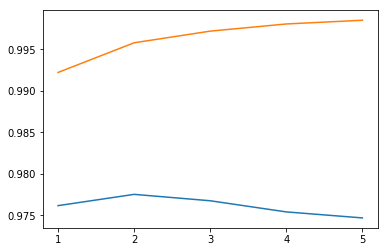

In [30]:
calculated_all_metrics(ex3_scores)
plot_learningcurve(ex3_scores, Labels.ALL, Metrics.ROC_AUC)

### Dilated CNN

In [31]:
ex4_scores = np.load('data/scores/cnn_dilated/scores_1544054844.630442.npy')
ex4_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9761 ±0.0006
Toxic:               0.9618 ±0.0015
Severe toxic:        0.9877 ±0.0005
Obscene:             0.9760 ±0.0005
Threat:              0.9753 ±0.0021
Insult:              0.9666 ±0.0008
Identity hate:       0.9635 ±0.0044
F1 over 5 runs:
All labels:          0.6360 ±0.0050
Toxic:               0.6736 ±0.0033
Severe toxic:        0.3812 ±0.0516
Obscene:             0.6985 ±0.0059
Threat:              0.0073 ±0.0107
Insult:              0.6324 ±0.0041
Identity hate:       0.0000 ±0.0000


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


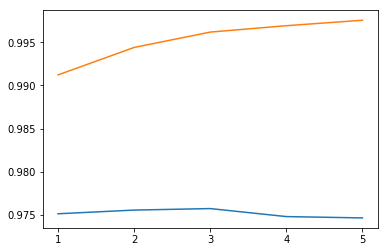

In [32]:
calculated_all_metrics(ex4_scores)
plot_learningcurve(ex4_scores, Labels.ALL, Metrics.ROC_AUC)

# Preprocessing comparison

### Baseline

In [33]:
ep1_scores = np.load('data/scores/preprocessing/e1_scores_1544101761.8759387.npy')
ep1_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9789 ±0.0007
Toxic:               0.9629 ±0.0006
Severe toxic:        0.9868 ±0.0004
Obscene:             0.9756 ±0.0003
Threat:              0.9841 ±0.0014
Insult:              0.9710 ±0.0008
Identity hate:       0.9766 ±0.0012
F1 over 5 runs:
All labels:          0.6358 ±0.0085
Toxic:               0.6655 ±0.0102
Severe toxic:        0.3658 ±0.0149
Obscene:             0.6829 ±0.0051
Threat:              0.4200 ±0.0282
Insult:              0.6524 ±0.0035
Identity hate:       0.0000 ±0.0000


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


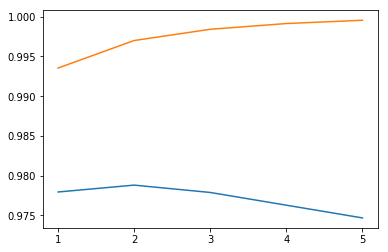

In [34]:
calculated_all_metrics(ep1_scores)
plot_learningcurve(ep1_scores, Labels.ALL, Metrics.ROC_AUC)

### Strip more than 3 of the same characters in a row

In [35]:
ep2_scores = np.load('data/scores/preprocessing/e2_scores_1544182966.0022054.npy')
ep2_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9789 ±0.0006
Toxic:               0.9628 ±0.0003
Severe toxic:        0.9869 ±0.0003
Obscene:             0.9760 ±0.0003
Threat:              0.9867 ±0.0016
Insult:              0.9712 ±0.0007
Identity hate:       0.9765 ±0.0011
F1 over 5 runs:
All labels:          0.6357 ±0.0090
Toxic:               0.6669 ±0.0101
Severe toxic:        0.3723 ±0.0069
Obscene:             0.6842 ±0.0043
Threat:              0.4327 ±0.0255
Insult:              0.6565 ±0.0029
Identity hate:       0.0000 ±0.0000


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


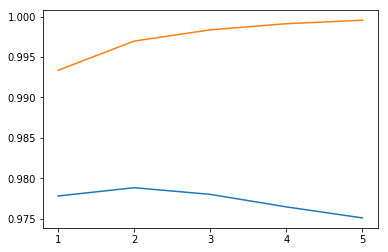

In [36]:
calculated_all_metrics(ep2_scores)
plot_learningcurve(ep2_scores, Labels.ALL, Metrics.ROC_AUC)

### Remove all punctuation

In [37]:
ep3_scores = np.load('data/scores/preprocessing/e3_scores_1544437960.7343206.npy')
ep3_scores.shape

(5, 2, 5, 7, 2)

/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


ROC AUC over 5 runs:
All labels:          0.9788 ±0.0005
Toxic:               0.9626 ±0.0007
Severe toxic:        0.9861 ±0.0007
Obscene:             0.9760 ±0.0005
Threat:              0.9834 ±0.0022
Insult:              0.9712 ±0.0007
Identity hate:       0.9746 ±0.0020
F1 over 5 runs:
All labels:          0.6396 ±0.0053
Toxic:               0.6642 ±0.0118
Severe toxic:        0.3677 ±0.0258
Obscene:             0.6832 ±0.0070
Threat:              0.4183 ±0.0454
Insult:              0.6548 ±0.0060
Identity hate:       0.0000 ±0.0000


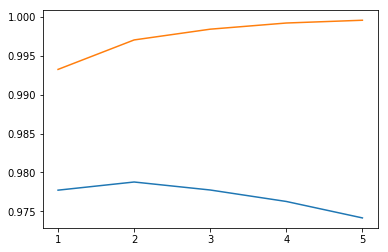

In [38]:
calculated_all_metrics(ep3_scores)
plot_learningcurve(ep3_scores, Labels.ALL, Metrics.ROC_AUC)

### Remove all punctuation except for .,!?

In [39]:
ep4_scores = np.load('data/scores/preprocessing/e4_scores_1544454982.5633452.npy')
ep4_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9791 ±0.0003
Toxic:               0.9629 ±0.0005
Severe toxic:        0.9870 ±0.0005
Obscene:             0.9761 ±0.0003
Threat:              0.9842 ±0.0021
Insult:              0.9719 ±0.0005
Identity hate:       0.9759 ±0.0008
F1 over 5 runs:
All labels:          0.6405 ±0.0079
Toxic:               0.6603 ±0.0119
Severe toxic:        0.3736 ±0.0089
Obscene:             0.6827 ±0.0078
Threat:              0.4425 ±0.0290
Insult:              0.6535 ±0.0027
Identity hate:       0.0000 ±0.0000


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


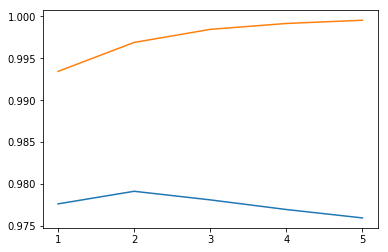

In [40]:
calculated_all_metrics(ep4_scores)
plot_learningcurve(ep4_scores, Labels.ALL, Metrics.ROC_AUC)

### Stemming

In [41]:
ep5_scores = np.load('data/scores/preprocessing/e5_scores_1544714914.6546211.npy')
ep5_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9797 ±0.0006
Toxic:               0.9637 ±0.0003
Severe toxic:        0.9878 ±0.0008
Obscene:             0.9766 ±0.0005
Threat:              0.9892 ±0.0014
Insult:              0.9719 ±0.0007
Identity hate:       0.9799 ±0.0013
F1 over 5 runs:
All labels:          0.6430 ±0.0103
Toxic:               0.6702 ±0.0091
Severe toxic:        0.3677 ±0.0382
Obscene:             0.6832 ±0.0053
Threat:              0.4208 ±0.0301
Insult:              0.6568 ±0.0054
Identity hate:       0.0000 ±0.0000


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


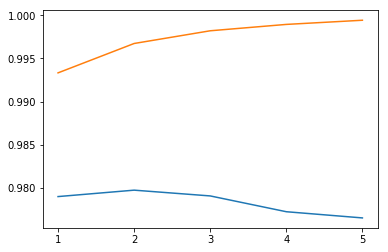

In [42]:
calculated_all_metrics(ep5_scores)
plot_learningcurve(ep5_scores, Labels.ALL, Metrics.ROC_AUC)

### Lemmatization

In [43]:
ep6_scores = np.load('data/scores/preprocessing/e6_scores_1544744071.8302839.npy')
ep6_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9796 ±0.0004
Toxic:               0.9630 ±0.0008
Severe toxic:        0.9865 ±0.0004
Obscene:             0.9766 ±0.0006
Threat:              0.9854 ±0.0019
Insult:              0.9724 ±0.0008
Identity hate:       0.9776 ±0.0007
F1 over 5 runs:
All labels:          0.6448 ±0.0037
Toxic:               0.6602 ±0.0130
Severe toxic:        0.3647 ±0.0209
Obscene:             0.6893 ±0.0057
Threat:              0.4233 ±0.0380
Insult:              0.6582 ±0.0058
Identity hate:       0.0000 ±0.0000


/home/philipp/miniconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


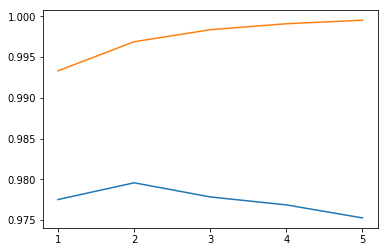

In [44]:
calculated_all_metrics(ep6_scores)
plot_learningcurve(ep6_scores, Labels.ALL, Metrics.ROC_AUC)